In [24]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Load the feature-engineered data
df = pd.read_csv(r'C:\Users\HP\Desktop\Incident-Response-Dashboard\data\feature_engineered_incident_data.csv')

In [25]:
df.head()

,Unnamed: 0,timestamp,protocol,port,attack_type,severity,event_type,hour,day_of_week,day,month,attack_type_encoded,event_type_encoded,protocol_encoded,severity_rolling_avg,lag_1_attack_type,lag_2_attack_type
0,0,2025-04-21 12:01:42.053741,TCP,7711,Normal,1.63,File Transfer,12,0,21,4,3,1,1,0.716667,3.0,3.0
1,1,2025-04-21 12:02:40.053741,UDP,614,Normal,0.03,File Transfer,12,0,21,4,3,1,2,0.716667,3.0,3.0
2,2,2025-04-21 12:03:30.053741,TCP,3539,Normal,0.49,File Transfer,12,0,21,4,3,1,1,0.716667,3.0,3.0
3,3,2025-04-21 12:02:36.053741,TCP,1466,Normal,1.33,Login,12,0,21,4,3,2,1,0.616667,3.0,3.0
4,4,2025-04-21 12:02:30.053741,UDP,7847,Normal,1.07,Login,12,0,21,4,3,2,2,0.963333,3.0,3.0


In [26]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'protocol', 'port', 'attack_type',
       'severity', 'event_type', 'hour', 'day_of_week', 'day', 'month',
       'attack_type_encoded', 'event_type_encoded', 'protocol_encoded',
       'severity_rolling_avg', 'lag_1_attack_type', 'lag_2_attack_type'],
      dtype='object')

In [27]:
# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0'])

In [28]:
# Set the index to timestamp for time series forecasting
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

In [29]:
# Check the columns and the first few rows to confirm data
print(df.columns)
print(df.head())

Index(['protocol', 'port', 'attack_type', 'severity', 'event_type', 'hour',
       'day_of_week', 'day', 'month', 'attack_type_encoded',
       'event_type_encoded', 'protocol_encoded', 'severity_rolling_avg',
       'lag_1_attack_type', 'lag_2_attack_type'],
      dtype='object')
                           protocol  port attack_type  severity  \
timestamp                                                         
2025-04-21 12:01:42.053741      TCP  7711      Normal      1.63   
2025-04-21 12:02:40.053741      UDP   614      Normal      0.03   
2025-04-21 12:03:30.053741      TCP  3539      Normal      0.49   
2025-04-21 12:02:36.053741      TCP  1466      Normal      1.33   
2025-04-21 12:02:30.053741      UDP  7847      Normal      1.07   

                               event_type  hour  day_of_week  day  month  \
timestamp                                                                  
2025-04-21 12:01:42.053741  File Transfer    12            0   21      4   
2025-04-21 12:02:40.

In [30]:
# ARIMA Model for forecasting attack severity
arima_model = ARIMA(df['severity'], order=(5, 1, 0))  # (p,d,q)
arima_model_fit = arima_model.fit()

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  

In [31]:
# Make predictions
arima_predictions = arima_model_fit.forecast(steps=10)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


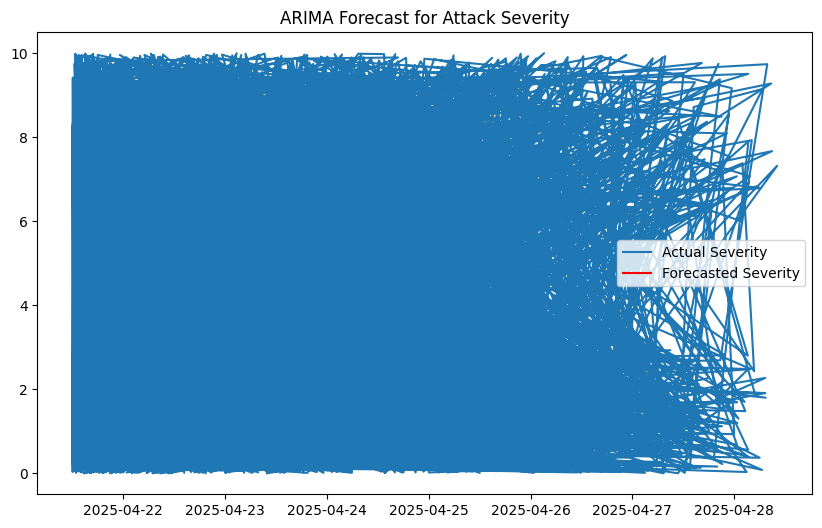

In [32]:
# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(df['severity'], label='Actual Severity')
plt.plot(pd.Series(arima_predictions, index=pd.date_range(start=df.index[-1], periods=11, freq='D')[1:]), label='Forecasted Severity', color='red')
plt.legend()
plt.title("ARIMA Forecast for Attack Severity")
plt.show()

In [33]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Assuming arima_predictions and the last 10 severity values from the dataset are available
actual_values = df['severity'].values[-10:]

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, arima_predictions)
print("ARIMA MAE:", mae)

# Calculate Root Mean Squared Error (RMSE)
arima_rmse = np.sqrt(((arima_predictions - actual_values)**2).mean())
print("ARIMA RMSE:", arima_rmse)

# Calculate R-squared (R²) value
r2 = r2_score(actual_values, arima_predictions)
print("ARIMA R²:", r2)


ARIMA MAE: 3.70646009173405
ARIMA RMSE: 4.093376384822337
ARIMA R²: -0.1360460221186206
